In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

df = pd.read_csv("framingham.csv")
df.isnull().sum()# Ermittlung der NaN Werte

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [3]:
df.rename(columns={'male':'Sex'}, inplace = True)
df


,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### **1) Column "cigsPerDay": Replace NaN with the mean of all smokers **

In [4]:
mean_without_notSmokers = df[df.cigsPerDay>0].cigsPerDay.mean()
mean_without_notSmokers

18.350605326876515

In [ ]:
df_1=df['cigsPerDay'].isnull()
filtered_df=df[df_1]
filtered_df

In [6]:
df['cigsPerDay']= np.where((df.currentSmoker == 1) & (df.cigsPerDay.isnull()), mean_without_notSmokers, df.cigsPerDay)
df.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#df[131:140]

### **2) Column "BPMeds": Handling of NaN values in this column**

In [ ]:
#df_2=df['BPMeds'].isnull()
#df_2=df[(df.sysBP>140) & (df.diaBP>90)]
df_2=df[(df.prevalentHyp == 1) ]
#df_2=df['BPMeds'] == 1
#df_2=df['sysBP'] > 140
#df_2=df['diaBP'] > 90
#df_2=df['BPMeds'] == 1
#filtered_df=df[df_2]
#filtered_df
df_2

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0
12,1,46,1.0,1,15.0,0.0,0,1,0,294.0,142.0,94.0,26.31,98.0,64.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1


In [8]:
VAR_BPMeds = 0
float(VAR_BPMeds)
df['BPMeds']= np.where((df.BPMeds.isnull()), VAR_BPMeds, df.BPMeds)
df.isnull().sum()


Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### **3) Column "totChol": Handling of NaN values in this column**

In [9]:
df_3=df['totChol'].isnull()
filtered_df3= df[df_3]
filtered_df3

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
154,0,38,3.0,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
247,0,40,2.0,1,20.0,0.0,0,0,1,NaN,114.0,65.0,21.19,61.0,NaN,1
429,1,65,NaN,0,0.0,0.0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.0,0
567,0,66,2.0,1,15.0,0.0,0,1,0,NaN,188.0,108.5,20.49,90.0,NaN,0
577,0,37,2.0,1,30.0,0.0,0,0,0,NaN,115.0,79.0,28.41,85.0,NaN,0
609,0,41,1.0,1,30.0,0.0,0,0,0,NaN,122.5,80.0,18.86,105.0,NaN,0
673,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
822,0,62,2.0,1,30.0,0.0,0,0,0,NaN,153.0,60.0,27.47,60.0,NaN,0
834,0,59,1.0,0,0.0,0.0,0,1,0,NaN,153.5,89.5,26.08,71.0,113.0,0


In [10]:
mean_totChol = df.totChol.mean()
mean_totChol

236.72158548233045

In [11]:
df['totChol']= np.where((df.totChol.isnull()), mean_totChol, df.totChol)
df.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### **4) Column "BMI": Handling of NaN values in this column.**

In [12]:
df_4=df['BMI'].isnull()
filtered_df4= df[df_4]
filtered_df4

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
97,0,40,2.0,0,0.0,0.0,0,0,0,205.000000,100.0,60.0,NaN,60.0,72.0,1
294,0,47,1.0,1,25.0,0.0,0,1,1,258.000000,195.0,90.0,NaN,86.0,NaN,1
705,0,45,3.0,0,0.0,0.0,0,0,0,231.000000,107.5,57.5,NaN,81.0,NaN,0
1155,0,64,2.0,1,3.0,0.0,0,0,0,221.000000,148.0,85.0,NaN,90.0,80.0,1
1161,0,47,2.0,0,0.0,0.0,0,0,0,195.000000,126.0,75.0,NaN,60.0,NaN,1
1594,0,40,2.0,0,0.0,0.0,0,0,0,164.000000,135.0,75.0,NaN,75.0,85.0,0
1604,1,40,NaN,1,20.0,0.0,0,0,0,266.000000,101.0,73.0,NaN,70.0,64.0,0
1624,0,70,1.0,0,0.0,0.0,1,1,0,107.000000,143.0,93.0,NaN,68.0,62.0,1
1747,0,51,1.0,0,0.0,0.0,0,0,0,236.721585,130.0,89.5,NaN,80.0,NaN,0
1975,1,63,1.0,1,20.0,0.0,1,1,0,213.000000,163.0,94.0,NaN,76.0,69.0,1


<function matplotlib.pyplot.show>

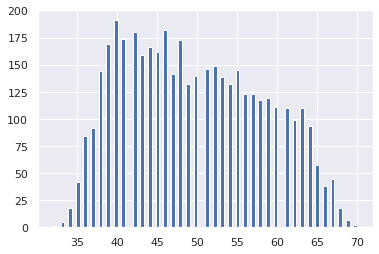

In [ ]:
plt.hist(df['age'],80)
plt.show

In [ ]:
filtered_df4.describe()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show>

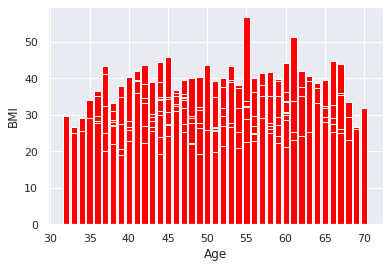

In [ ]:
x = df['age']
y = df['BMI']

plt.bar(x,y, color='red')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show

<function matplotlib.pyplot.show>

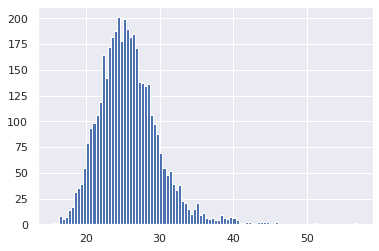

In [ ]:
plt.hist(df['BMI'],100)
plt.show

<function matplotlib.pyplot.show>

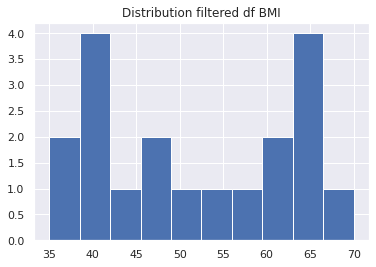

In [13]:
plt.hist(filtered_df4['age'],10)
plt.title('Distribution filtered df BMI')
plt.show

In [29]:
# BMI Tabelle (Einteilung nach NRC, Diet and Health. Implications for Reducing Chronic Disease Risk)
# https://ladr.de/service/rechenprogramme/bmi

i = 1
VAR_1 = 19
VAR_2 = 24
VAR_max = df['age'].max()

while i < 7:

  if VAR_1 == 19: # Start Age of 19
      mean_BMI = df[(df.age >= VAR_1) & (df.age <= VAR_2)].BMI.mean()
      mean_BMI = round(mean_BMI, 2)
      df['BMI']= np.where((df.age >= VAR_1) & (df.age <= VAR_2) & (df.BMI.isnull()), mean_BMI, df.BMI)
      
  elif VAR_1 >= 25 and VAR_1 <= 54:
      mean_BMI = df[(df.age >= VAR_1) & (df.age <= VAR_2)].BMI.mean()
      mean_BMI = round(mean_BMI, 2)
      df['BMI']= np.where((df.age >= VAR_1) & (df.age <= VAR_2) & (df.BMI.isnull()), mean_BMI, df.BMI)

  elif VAR_1 == 55:
      mean_BMI = df[(df.age >= VAR_1) & (df.age <= VAR_2)].BMI.mean()
      mean_BMI = round(mean_BMI, 2)
      df['BMI']= np.where((df.age >= VAR_1) & (df.age <= VAR_2) & (df.BMI.isnull()), mean_BMI, df.BMI)

  elif VAR_1 == 66:
      mean_BMI = df[(df.age >= 66)& (df.age <= VAR_max)].BMI.mean()
      mean_BMI = round(mean_BMI, 2)
      df['BMI']= np.where((df.age >= VAR_1) & (df.age <= VAR_max) & (df.BMI.isnull()), mean_BMI, df.BMI)

  print('Mean of BMI(NRC): ',mean_BMI,'\tAge from: ', VAR_1,' to ', VAR_2)

  if i == 1:
    VAR_1 = 25
    VAR_2 = 34
  elif i >= 2 and i <= 3:
    VAR_1 = VAR_1 + 10
    VAR_2 = VAR_2 + 10
  elif i == 4:
    VAR_1 = 55
    VAR_2 = 65
  elif i == 5:
    VAR_1 = 66
    VAR_2 = VAR_max 

  i += 1

Mean of BMI(NRC):  nan 	Age from:  19  to  24
Mean of BMI(NRC):  23.67 	Age from:  25  to  34
Mean of BMI(NRC):  25.24 	Age from:  35  to  44
Mean of BMI(NRC):  25.75 	Age from:  45  to  54
Mean of BMI(NRC):  26.48 	Age from:  55  to  65
Mean of BMI(NRC):  26.73 	Age from:  66  to  70


<function matplotlib.pyplot.show>

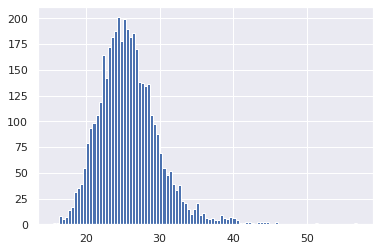

In [25]:
plt.hist(df['BMI'],100)
plt.show

In [26]:
df.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df[294:295]

### **5) Education: Handling of NaN values**

In [32]:
df['education']= np.where((df.education.isnull()), 1, df.education)

In [33]:
df.isnull().sum()

Sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### **6) Column "heartRate": Handling of NaN values in this column**

In [34]:
df = df.dropna(subset=['heartRate'], axis=0)

In [35]:
#df.info()
df.isnull().sum()

Sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

7) Column "glucose": Handling of NaN values in this column

In [ ]:
df['diabetes'].value_counts()

0    4128
1     109
Name: diabetes, dtype: int64

In [ ]:
df_15=df['glucose'].isnull()
#df_15=df['diabetes'] == 1
filtered_df15= df[df_15]
filtered_df15

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.000000,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.000000,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.000000,110.0,72.5,26.59,65.0,NaN,0
42,0,52,1.0,0,0.0,1.0,0,1,0,236.721585,148.0,92.0,25.09,70.0,NaN,1
54,0,39,2.0,1,20.0,0.0,0,0,0,209.000000,115.0,75.0,22.54,90.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,0,41,2.0,1,5.0,0.0,0,0,0,205.000000,105.0,74.0,20.85,87.0,NaN,0
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.000000,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.000000,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.000000,170.0,102.0,22.89,57.0,NaN,0


In [ ]:
filtered_df15['diabetes'].value_counts()

0    384
1      4
Name: diabetes, dtype: int64

In [ ]:
#df.to_csv("Glucose_framingham.csv", index = False, header=True)

<function matplotlib.pyplot.show>

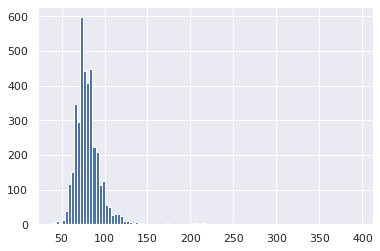

In [ ]:
plt.hist(df['glucose'],100)
plt.show

In [ ]:
df.glucose.describe()

count    3849.000000
mean       81.964406
std        23.962669
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

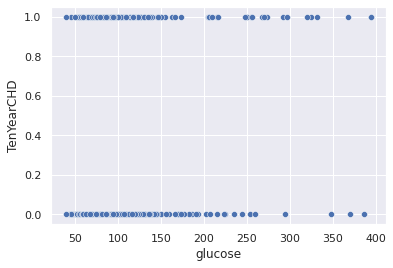

In [ ]:

sns.scatterplot(data=df, x="glucose", y="TenYearCHD")


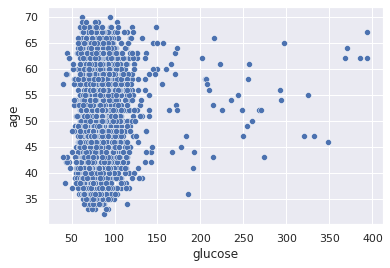

In [36]:
sns.scatterplot(data=df, x="glucose", y="age")

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

df1=df.dropna()
x=df1.drop(columns=['glucose','TenYearCHD'], axis=1)
y=df1['glucose']

# Training and test data
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=5)

# Standardization of xtrain & xtest
scaler = StandardScaler().fit(xtrain)
standard_X = scaler.transform(xtrain)
standard_X_test = scaler.transform(xtest)

# Create the model
#knn = neighbors.KNeighborsClassifier(n_neighbors=5) # 
knn = neighbors.KNeighborsRegressor(n_neighbors=5) #to define the classifier object

# How to find the optimum k (n_neighbors) value! Using of GridSearchCV
knn_grid = GridSearchCV(estimator = knn, scoring='neg_mean_squared_error',
                param_grid={'n_neighbors': np.arange(1,20)}, cv=5)
knn_grid.fit(standard_X,ytrain)
kOptimum = knn_grid.best_params_['n_neighbors']
print(knn_grid.best_params_)
print(-knn_grid.best_score_)
print(knn_grid.scorer_)

#Create the model with optimum k (n_neighbors)
knn = neighbors.KNeighborsRegressor(n_neighbors = kOptimum)

# Model fitting
knn.fit(standard_X, ytrain) # to fit only on training data

#Prediction
ypred = knn.predict(standard_X_test)
print('Prediction: ', ypred)

#Evaluate Model Performance
print('MSE_KNN:',mean_squared_error(ytest, ypred)) #Regression Metric

Glucose_mean = ytrain.mean()

print('MSE_Glucose_original:',mean_squared_error(ytest, [Glucose_mean]*len(ytest)))

{'n_neighbors': 19}
352.86188561020816
make_scorer(mean_squared_error, greater_is_better=False)
Prediction:  [78.84210526 79.89473684 81.10526316 ... 77.26315789 76.94736842
 81.94736842]
MSE_KNN: 472.45483805206806
MSE_Glucose_original: 712.0527716241158


In [38]:
df.loc[df['glucose'].isna(),:]


,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.000000,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.000000,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.000000,110.0,72.5,26.59,65.0,NaN,0
42,0,52,1.0,0,0.0,1.0,0,1,0,236.721585,148.0,92.0,25.09,70.0,NaN,1
54,0,39,2.0,1,20.0,0.0,0,0,0,209.000000,115.0,75.0,22.54,90.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,0,41,2.0,1,5.0,0.0,0,0,0,205.000000,105.0,74.0,20.85,87.0,NaN,0
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.000000,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.000000,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.000000,170.0,102.0,22.89,57.0,NaN,0


In [39]:
df2 = df.loc[df['glucose'].isna(),:]
dfx = df2.drop(columns=['glucose','TenYearCHD'], axis=1)

dfx = scaler.transform(dfx) # Standardisierung der Werte in der oben ausgeleiteten Tabelle und Speicherung unter dfx

In [40]:
glucose_pred = knn.predict(dfx) # Anwendung des trainierten KNN Models auf das Datenset dfx und Speicherung der NaN Glucose Werte unter glucose_pred

In [41]:
df.loc[df['glucose'].isna(),'glucose'] = glucose_pred # Die vorhergesagten Glucose Werte in dem ursprünglichen Datenset für NaN Werte einsetzen

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [42]:
df[4228:4230]

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,85.736842,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,82.052632,0


In [43]:
len(glucose_pred)
glucose_pred

array([ 78.15789474,  84.94736842,  82.15789474,  80.78947368,
        77.47368421,  78.21052632,  78.36842105,  85.21052632,
        74.94736842,  78.05263158,  78.10526316,  75.52631579,
        75.47368421,  79.73684211,  85.94736842, 178.68421053,
        77.15789474,  76.94736842,  76.15789474,  78.68421053,
        77.57894737, 161.84210526,  77.26315789,  77.84210526,
        82.15789474,  81.05263158,  75.52631579,  82.10526316,
        86.89473684,  80.10526316,  80.10526316,  80.21052632,
        83.10526316,  82.36842105,  80.36842105,  76.84210526,
        78.05263158,  79.89473684,  81.21052632,  83.10526316,
        83.21052632,  72.36842105,  79.21052632,  76.89473684,
        79.89473684,  76.52631579,  78.63157895,  82.42105263,
        81.68421053,  74.84210526,  78.73684211,  82.89473684,
        76.57894737,  77.57894737,  90.        ,  79.15789474,
        79.84210526,  77.21052632,  77.68421053,  77.21052632,
        79.26315789,  82.42105263,  80.21052632,  81.78